Нейромережі. Підібрати модель, зробити прогноз, похибка, графік, пояснення.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.compat.v1.keras.models import Sequential
from tensorflow.compat.v1.keras.layers import LSTM,Dense,Dropout

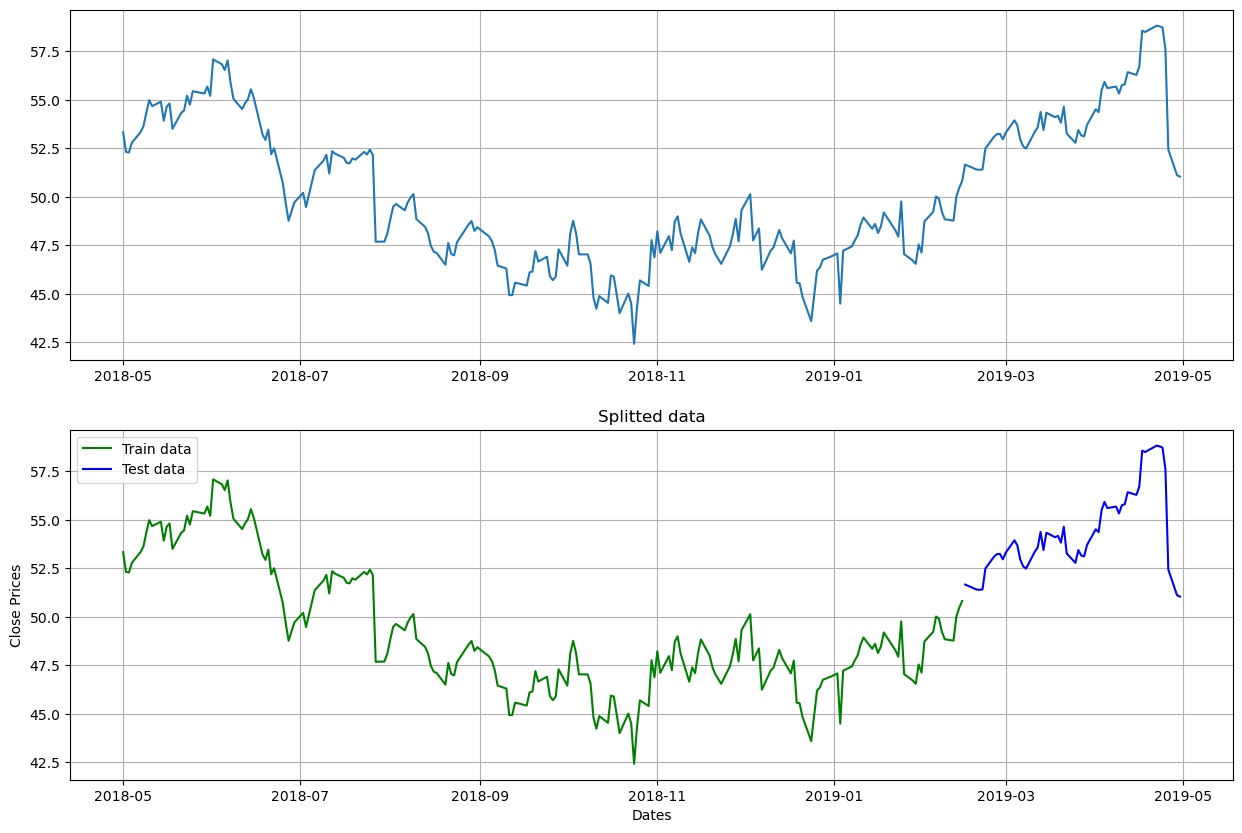

In [2]:
data = pd.read_csv('INTC.csv',parse_dates = ['Date'])
data.rename(columns={' Close/Last':'Close'},inplace=True)
data = data.sort_values('Date', ascending=True)
#data.Close = data.Close.apply(lambda x: x[2:]).astype("float64")

data.drop(columns=['Open','High','Low','Adj Close','Volume'],axis=0,inplace=True)
data.reset_index(inplace=True,drop=True)

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.grid(True)
plt.plot(data.Date,data.Close);


train_data, test_data = train_test_split(data,test_size=0.2, random_state=42,shuffle=False)
training_set,test_set =train_data.Close.values.reshape(-1,1), test_data.Close.values.reshape(-1,1)

plt.subplot(212)
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(train_data.Date,train_data.Close.values, 'green', label='Train data')
plt.plot(test_data.Date,test_data.Close.values, 'blue', label='Test data')
plt.title("Splitted data")
plt.legend();

Нормалізуємо дані

In [3]:
scaler =  MinMaxScaler().fit(X=data.Close.values.reshape(-1,1))
training_set_scaled, test_set_scaled = scaler.transform(training_set), scaler.transform(test_set)

steps = 75
def generate_sequences(f_data):
    sequences,labels = [], []
    for i in range(len(f_data)-steps):
        sequences.append(np.array(f_data[i:i+steps]).reshape(-1,1))
        labels.append(f_data[i+steps][0])
    return np.array(sequences),np.array(labels)
test_sequences = np.concatenate([training_set_scaled[-steps:],test_set_scaled])
X_train,y_train = generate_sequences(training_set_scaled)
X_test,y_test = generate_sequences(test_sequences)

Будуємо та тренуємо модель

In [ ]:
model = Sequential([LSTM(units=50,return_sequences=True,dropout=0.1),
                    LSTM(units=50,return_sequences=True,dropout=0.1),
                    LSTM(units=50,return_sequences=True,dropout=0.1),
                    LSTM(units=50),
                    Dense(units=1)],name="initial")
model.compile(optimizer='adam',loss='mean_squared_error')
history1=model.fit(X_train,y_train, epochs=50,batch_size=32);

Epoch 1/50
4/4 [==============================] - 26s 295ms/step - loss: 0.0783
Epoch 2/50
4/4 [==============================] - 1s 296ms/step - loss: 0.0227
Epoch 3/50
4/4 [==============================] - 1s 296ms/step - loss: 0.0199
Epoch 4/50
4/4 [==============================] - 1s 297ms/step - loss: 0.0104
Epoch 5/50
4/4 [==============================] - 1s 294ms/step - loss: 0.0131
Epoch 6/50
4/4 [==============================] - 1s 289ms/step - loss: 0.0092
Epoch 7/50
4/4 [==============================] - 1s 293ms/step - loss: 0.0105
Epoch 8/50
4/4 [==============================] - 1s 298ms/step - loss: 0.0095
Epoch 9/50
4/4 [==============================] - 1s 298ms/step - loss: 0.0089
Epoch 10/50
4/4 [==============================] - 1s 298ms/step - loss: 0.0091
Epoch 11/50
4/4 [==============================] - 1s 296ms/step - loss: 0.0088
Epoch 12/50
4/4 [==============================] - 1s 298ms/step - loss: 0.0085
Epoch 13/50
4/4 [==============================]

Робимо передбачення, обчислюємо похибку, довірчі інтервали, візуалізуємо

In [ ]:
yhat = model.predict(X_test)
yhat_reversed = scaler.inverse_transform(yhat)
print(f"MSE={mean_squared_error(y_test,yhat_reversed)}")
plt.plot(history1.history['loss']);

In [ ]:
plt.figure(figsize=(15,5))
plt.grid(True)    
plt.plot(train_data.Date,train_data.Close.values,label='Train data')
plt.plot(test_data.Date,yhat_reversed,label='LSTM')
plt.plot(test_data.Date,test_data.Close.values,label='Test data')
# plt.fill_between(test_data.Date,confint[0],confint[1],color='b', alpha=0.05)
plt.legend(loc=3);

З графіків можемо побачити, що НМ непогано тренується та здатна ефективно прогнозувати